In [67]:
# Import des bibliothèques
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# Création d'une classe
class XrayLoader:    
    def __init__(self, x_train=None, y_train=None, x_val=None, y_val=None, x_test=None, y_test=None, x_train_reshaped=None, x_test_reshaped=None, x_val_reshaped=None):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.x_test = x_test
        self.y_test = y_test
        self.x_train_reshaped = x_train_reshaped
        self.x_test_reshaped = x_test_reshaped
        self.x_val_reshaped = x_val_reshaped
        self.data_folder = './chest_Xray'
        self.image_size = (256,256)
        self.batch_size = 5

    def load_data(self):
        subfolders = ["train","val","test"]
        categories = ["NORMAL","PNEUMONIA"]
        data = {}

        for subfolder in subfolders:
            data[subfolder] = {"x":[],"y":[]}
            for category in categories:
                # pour avoir tous les chemins des 6 dossiers
                folder_path = os.path.join(self.data_folder,subfolder,category)
                # liste de toutes les images
                images_files = os.listdir(folder_path)
                for file_name in images_files:
                    try:
                        image_path = os.path.join(folder_path,file_name)
                        img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img,(256,256))
                        data[subfolder]["x"].append(img)
                        data[subfolder]["y"].append(category)
                    except:
                        pass
        
        self.x_train = np.array(data["train"]["x"])
        self.y_train = data["train"]["y"]
        self.x_val = np.array(data["val"]["x"])
        self.y_val = data["val"]["y"]
        self.x_test = np.array(data["test"]["x"])
        self.y_test = data["test"]["y"]
        self.x_train_reshaped = self.x_train.reshape(-1, 256*256)
        self.x_test_reshaped = self.x_test.reshape(-1, 256*256)
        self.x_val_reshaped = self.x_val.reshape(-1, 256*256)

    def load_data_faster(self):
        (self.x_train, self.y_train) = self.make_dataset(self.data_folder+'/train', self.batch_size, self.image_size)
        (self.x_val, self.y_val) = self.make_dataset(self.data_folder+'/val', self.batch_size, self.image_size)
        (self.x_test, self.y_test) = self.make_dataset(self.data_folder+'/test', self.batch_size, self.image_size)

    def display_image(self,dataset,index):
        if dataset == 'train':
            image = self.x_train[index]
            label = self.y_train[index]
        elif dataset == 'test':
            image = self.x_test[index]
            label = self.y_test[index]
        else:
            raise ValueError('Invalid dataset. Choose either "train" or "test".')

        plt.imshow(image,cmap="gray")
        plt.title(f'Image {index} - Chiffre: {label}')
        plt.axis('off')
        plt.show()

    def display_category_means(self):
        normal_mean = self.calculate_category_mean(self.x_train, self.y_train, "NORMAL")
        pneumonia_mean = self.calculate_category_mean(self.x_train, self.y_train, "PNEUMONIA")

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(normal_mean, cmap="gray")
        plt.title("Mean NORMAL Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(pneumonia_mean, cmap="gray")
        plt.title("Mean PNEUMONIA Image")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

    def calculate_category_mean(images, labels, category):
        images = np.array(images)
        labels = np.array(labels)
        category_images = images[labels == category]
        mean_image = np.mean(category_images, axis=0)
        return mean_image

    def display_distribution(self):
        test = ( self.y_test.count("NORMAL"), self.y_test.count("PNEUMONIA") )
        train = ( self.y_train.count("NORMAL"), self.y_train.count("PNEUMONIA") )
        val = ( self.y_val.count("NORMAL"), self.y_val.count("PNEUMONIA") )
        
        # Tracer les graphiques de distribution
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].bar(["NORMAL", "PNEUMONIA"], train)
        ax[0].set_title("Train Distribution")
        ax[1].bar(["NORMAL", "PNEUMONIA"], val)
        ax[1].set_title("Validation Distribution")
        ax[2].bar(["NORMAL", "PNEUMONIA"], test)
        ax[2].set_title("Test Distribution")
        plt.show()

In [34]:
# Charger les données : méthode 1
loader = XrayLoader()
loader.load_data()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5218,) + inhomogeneous part.

In [69]:
# Charger les données : méthode d'Yvan
loader = XrayLoader()
loader.load_data()
xtrain = loader.x_train
ytrain = loader.y_train
xtest = loader.x_test
ytest = loader.y_test
xval = loader.x_val
yval = loader.y_val
xtrainreshaped = loader.x_train_reshaped
xtestreshaped = loader.x_test_reshaped
xvalreshaped = loader.x_val_reshaped
loader = XrayLoader(x_train=xtrain, y_train=ytrain, x_val=xval, y_val=yval, x_test=xtest, y_test=ytest, x_train_reshaped=xtrainreshaped, x_test_reshaped=xtestreshaped, x_val_reshaped=xvalreshaped)

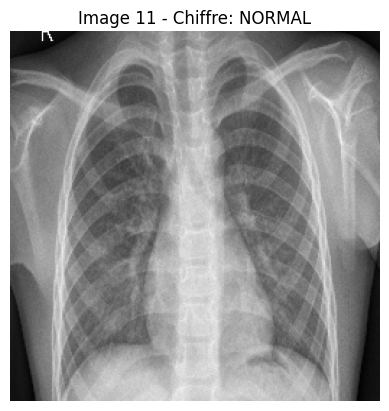

In [70]:
# Afficher une image
loader.display_image('test', 11)

In [ ]:
# Charger le loader avec les données
loader = XrayLoader(x_train=xtrain, y_train=ytrain, x_val=xval, y_val=yval, x_test=xtest, y_test=ytest, x_train_reshaped=xtrainreshaped, x_test_reshaped=xtestreshaped, x_val_reshaped=xvalreshaped)

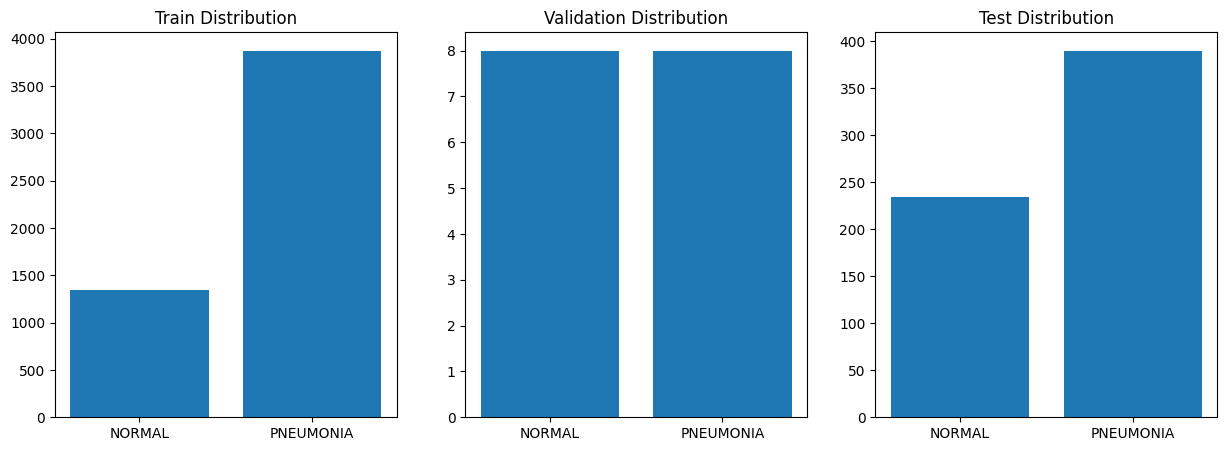

In [71]:
loader.display_distribution()

RANDOM FOREST

Accuracy: 0.75
Accuracy: 0.7516025641025641
Recall: 0.67


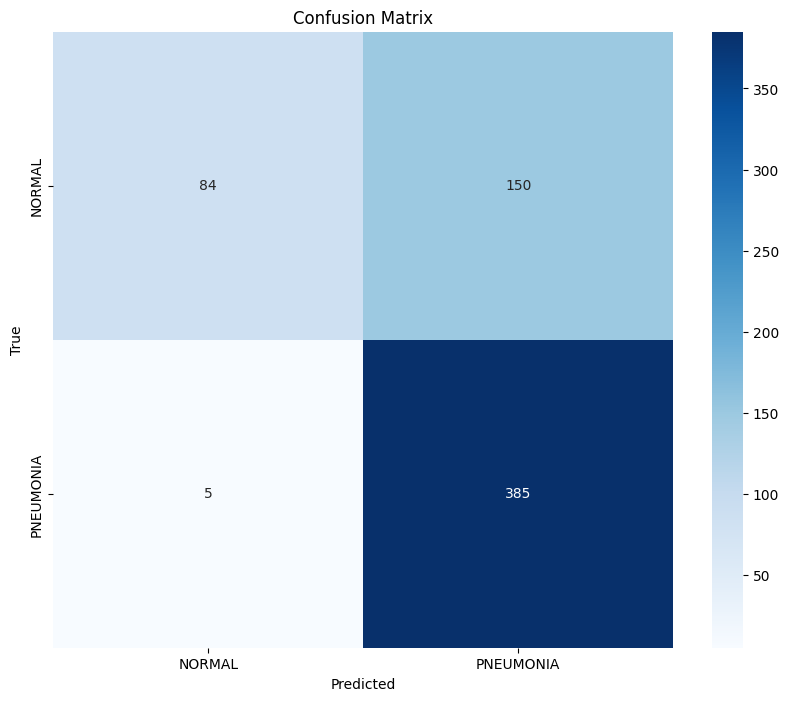

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = RandomForestClassifier()
model.fit(loader.x_train_reshaped, loader.y_train)

y_pred = model.predict(loader.x_test_reshaped)
accuracy = accuracy_score(loader.y_test, y_pred)
recall = recall_score(loader.y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Accuracy:", accuracy)
print(f"Recall: {recall:.2f}")

digits = ["NORMAL", "PNEUMONIA"]
# Compute the confusion matrix
cm = confusion_matrix(loader.y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=digits, yticklabels=digits)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

K NEIGHBORS CLASSIFIER

In [77]:
# Accuracy en utilisant K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

for i in range(10):
  if i !=0:
    # modèle KNN proposé dans le bootstrap qui se base sur la moyenne des valeurs
    model = KNeighborsClassifier(n_neighbors=i) # n_neighbors=k est un hyperparamètre -> indique le nombre de voisins les plus proches à prendre en compte lors de la prédiction
    # entraînement du modèle
    model.fit(loader.x_train_reshaped, loader.y_train)
    y_pred = model.predict(loader.x_test_reshaped)

    accuracy = accuracy_score(loader.y_test, y_pred) #et ici aussi met y_train
    recall = recall_score(loader.y_test, y_pred, average='macro')
    print("n_neighbors:", i)
    print("Accuracy:", accuracy)
    print(f"Recall: {recall:.2f}")

n_neighbors: 1
Accuracy: 0.7548076923076923
Recall: 0.68
n_neighbors: 2
Accuracy: 0.7932692307692307
Recall: 0.73
n_neighbors: 3
Accuracy: 0.7483974358974359
Recall: 0.67
n_neighbors: 4
Accuracy: 0.7788461538461539
Recall: 0.71
n_neighbors: 5
Accuracy: 0.7355769230769231
Recall: 0.65
n_neighbors: 6
Accuracy: 0.7580128205128205
Recall: 0.68
n_neighbors: 7
Accuracy: 0.7371794871794872
Recall: 0.65
n_neighbors: 8
Accuracy: 0.7516025641025641
Recall: 0.67
n_neighbors: 9
Accuracy: 0.7355769230769231
Recall: 0.65
